In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import glob

import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive/flowers'


In [ ]:
daisy_list= glob.glob("/content/drive/My Drive/flowers/daisy/*.jpg")
dandelion_list=glob.glob("/content/drive/My Drive/flowers/dandelion/*.jpg")
rose_list=glob.glob("/content/drive/My Drive/flowers/rose/*.jpg")
sunflower_list=glob.glob("/content/drive/My Drive/flowers/sunflower/*.jpg")
tulip_list=glob.glob("/content/drive/My Drive/flowers/tulip/*.jpg")

In [ ]:
print(len(daisy_list))
print(len(dandelion_list))
print(len(rose_list))
print(len(sunflower_list))
print(len(tulip_list))

764
1052
784
733
984


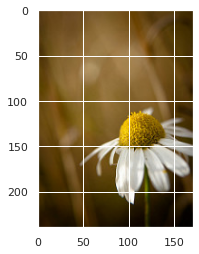

In [ ]:
img= load_img("/content/drive/My Drive/flowers/daisy/10437754174_22ec990b77_m.jpg")
plt.imshow(img)
plt.show()

In [11]:
X= []
Y= []

for image in daisy_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in dandelion_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in rose_list:
    X.append(resize(imread(image), (64,64,3)))
    
for image in sunflower_list:
    X.append(resize(imread(image), (64,64,3)))

for image in tulip_list:
    X.append(resize(imread(image), (64,64,3)))

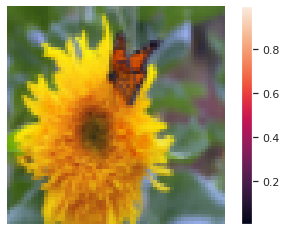

In [12]:
plt.imshow(X[3000])
plt.axis("off")
plt.colorbar()
plt.show()

In [13]:
x= img_to_array(X[200])
print(x.shape)

(64, 64, 3)


In [14]:
class_name = glob.glob(data_path +'/*')
number_of_class= len(class_name)
print("Number of Class :", number_of_class)

Number of Class : 5


In [15]:
model= Sequential()

model.add(Conv2D(64,(3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(512,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(number_of_class))
model.add(Activation("softmax"))

In [16]:
batch_size=32

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics= ["accuracy"])

In [18]:
train_datagen= ImageDataGenerator(rescale= 1./255,
                  shear_range=0.3,
                  horizontal_flip= True,
                  zoom_range=0.5)

test_datagen=  ImageDataGenerator(rescale= 1./255)

In [19]:
train_generator= train_datagen.flow_from_directory(
    data_path,
    target_size= x.shape[:2],
    batch_size=batch_size,
    color_mode= "rgb",
    class_mode="categorical")

test_generator= test_datagen.flow_from_directory(
    data_path,
    target_size= x.shape[:2],
    batch_size=batch_size,
    color_mode= "rgb",
    class_mode="categorical")

Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.


In [20]:
hist= model.fit_generator(
    generator= train_generator,
    steps_per_epoch= 1600//batch_size,
    epochs= 100,
    validation_data= test_generator,
    validation_steps= 800// batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
50/50 [==============================] - 51s 995ms/step - loss: 1.6032 - accuracy: 0.2830 - val_loss: 1.3046 - val_accuracy: 0.4525
Epoch 2/100
50/50 [==============================] - 49s 974ms/step - loss: 1.3247 - accuracy: 0.4089 - val_loss: 1.2463 - val_accuracy: 0.4762
Epoch 3/100
50/50 [==============================] - 50s 990ms/step - loss: 1.2703 - accuracy: 0.4575 - val_loss: 1.1547 - val_accuracy: 0.4875
Epoch 4/100
50/50 [==============================] - 49s 982ms/step - loss: 1.2088 - accuracy: 0.5006 - val_loss: 1.2320 - val_accuracy: 0.5063
Epoch 5/100
50/50 [==============================] - 49s 978ms/step - loss: 1.1225 - accuracy: 0.5494 - val_loss: 1.2049 - val_accuracy: 0.5263
Epoch 6/100
50/50 [==============================] - 49s 978ms/step - loss: 1.0607 - accuracy: 0.5744 - val_loss: 1.2169 - val_accuracy: 0.5213
Epoch 7/100
50/50 [==============================] - 49s 973ms/step - loss: 1.0471 - accuracy: 0.5886 - val_loss: 0.9290 - val_accuracy:

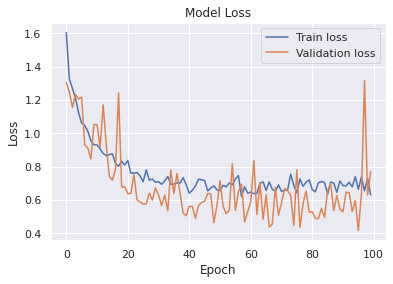

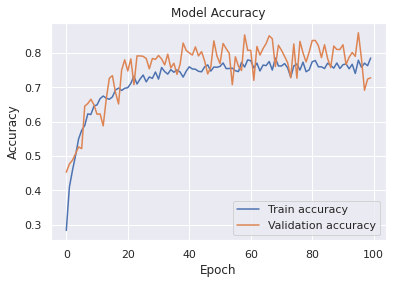

In [21]:
#Loss 
plt.plot(hist.history["loss"], label= "Train loss")
plt.plot(hist.history["val_loss"], label= "Validation loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Accuracy
plt.plot(hist.history["accuracy"], label= "Train accuracy")
plt.plot(hist.history["val_accuracy"], label= "Validation accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [22]:
print("Train loss:",hist.history["loss"][-1] )
print("Validation loss:",hist.history["val_loss"][-1] )
print("Train Accuracy:",hist.history["accuracy"][-1] )
print("Validation Accuracy:",hist.history["val_accuracy"][-1] )

Train loss: 0.6308317184448242
Validation loss: 0.7694389820098877
Train Accuracy: 0.7852222919464111
Validation Accuracy: 0.7275000214576721
